# Capstone 3: Forecasting Solar Power Using LTSM  
### _"Exploring ML Techniques for Solar Predictions"_
## Exploratory Data Analysis Objectives: 
### 1. Understand Data Distribution  
- Examine statistical summaries of key features.  
- Identify skewness and distribution patterns in numerical data.  
- Visualize density plots and histograms for variables.  

### 2. Identify Relationships and Trends  
- Correlation Analysis to identify relationships between features
- Time-Series Analysis to analyze trends in solar power generation and weather conditions over time.


### 3. Outlier Detection & Anomaly Investigation  
- Identify Outliers by using box plots to detect anomalies in power generation or weather conditions. Highlighting potential outliers that could skew the forecasting model's accuracy.
- Investigate Anomalies for detected outliers, by investigating patterns in weather data that may explain unusual behavior


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Solar/Data')

df = pd.read_csv('solar_cleaned.csv')

## 1. Understand Data Distribution 

In [215]:
df.head()

,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Inverter_Efficiency,Cumulative_Yield,Normalized_Yield,Plant_Efficiency,DATE,TIME,HOUR
0,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,6259559.0,0.0,0.052321,2020-05-15,00:00:00,0
1,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0.0,12443204.0,0.0,0.052321,2020-05-15,00:00:00,0
2,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0.0,19430963.0,0.0,0.052321,2020-05-15,00:00:00,0
3,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0.0,27033923.0,0.0,0.052321,2020-05-15,00:00:00,0
4,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0.0,34192887.0,0.0,0.052321,2020-05-15,00:00:00,0


In [217]:
df.info

<bound method DataFrame.info of                   DATE_TIME  PLANT_ID  AMBIENT_TEMPERATURE  \
0       2020-05-15 00:00:00         1            25.184316   
1       2020-05-15 00:00:00         1            25.184316   
2       2020-05-15 00:00:00         1            25.184316   
3       2020-05-15 00:00:00         1            25.184316   
4       2020-05-15 00:00:00         1            25.184316   
...                     ...       ...                  ...   
136467  2020-06-17 23:45:00         2            23.202871   
136468  2020-06-17 23:45:00         2            23.202871   
136469  2020-06-17 23:45:00         2            23.202871   
136470  2020-06-17 23:45:00         2            23.202871   
136471  2020-06-17 23:45:00         2            23.202871   

        MODULE_TEMPERATURE  IRRADIATION       SOURCE_KEY  DC_POWER  AC_POWER  \
0                22.857507          0.0  1BY6WEcLGh8j5v7       0.0       0.0   
1                22.857507          0.0  1IF53ai7Xc0U56Y       

In [219]:
df.dtypes

DATE_TIME               object
PLANT_ID                 int64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
Inverter_Efficiency    float64
Cumulative_Yield       float64
Normalized_Yield       float64
Plant_Efficiency       float64
DATE                    object
TIME                    object
HOUR                     int64
dtype: object

### 1.1 Visualize density plots and histograms for variables. 

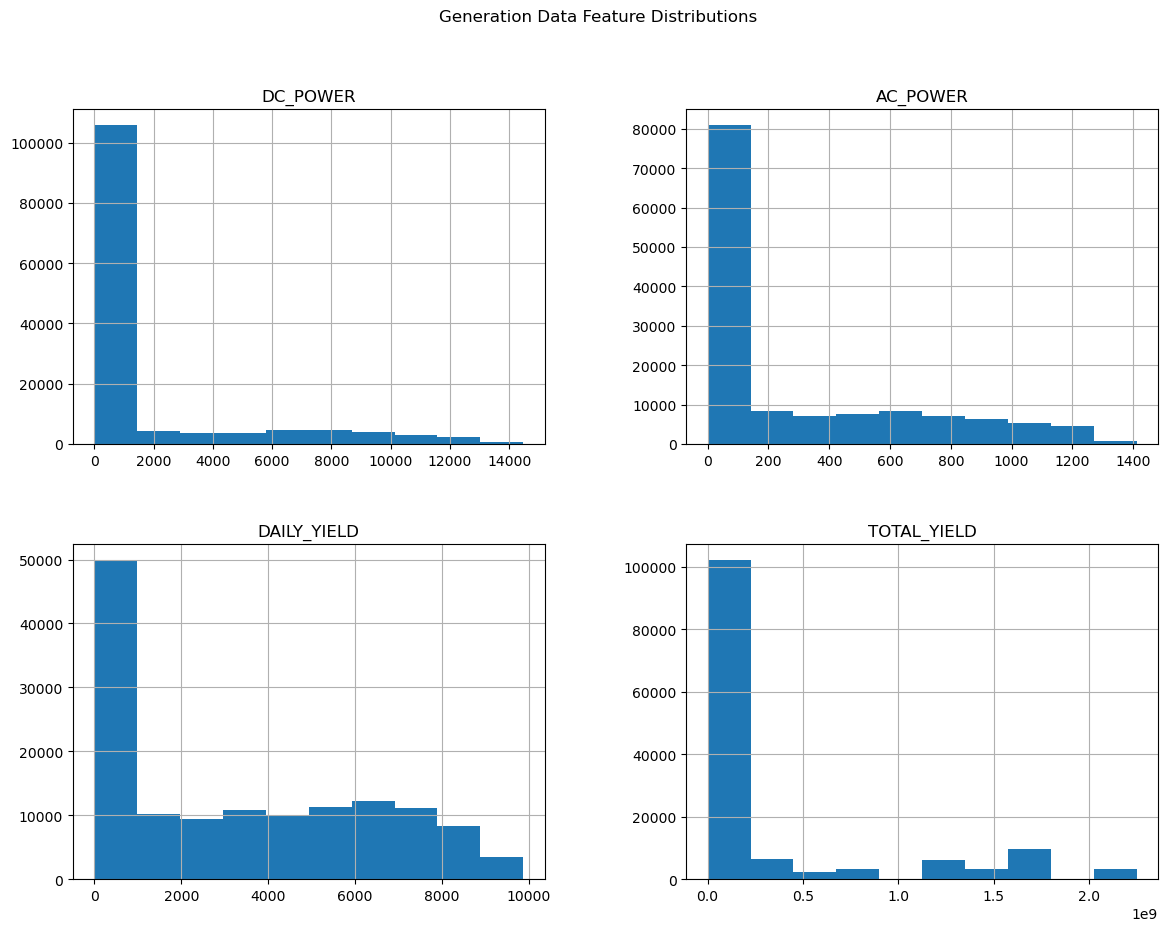

In [346]:

df[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(14, 10))
plt.suptitle("Generation Data Feature Distributions")
plt.show()

Insights on distribution:
- DC_POWER & AC_POWER, both features exhibit a steep decline in frequency as power increases (suggesting skewed distribution). 
- DAILY_YIELD, gradual decline with peaks in higher ranges indicates possible outliers. Transformations like scaling or normalization can help manage such discrepancies.
- TOTAL_YIELD, clusters around specific values, suggesting grouped or cumulative data that may need preprocessing. 

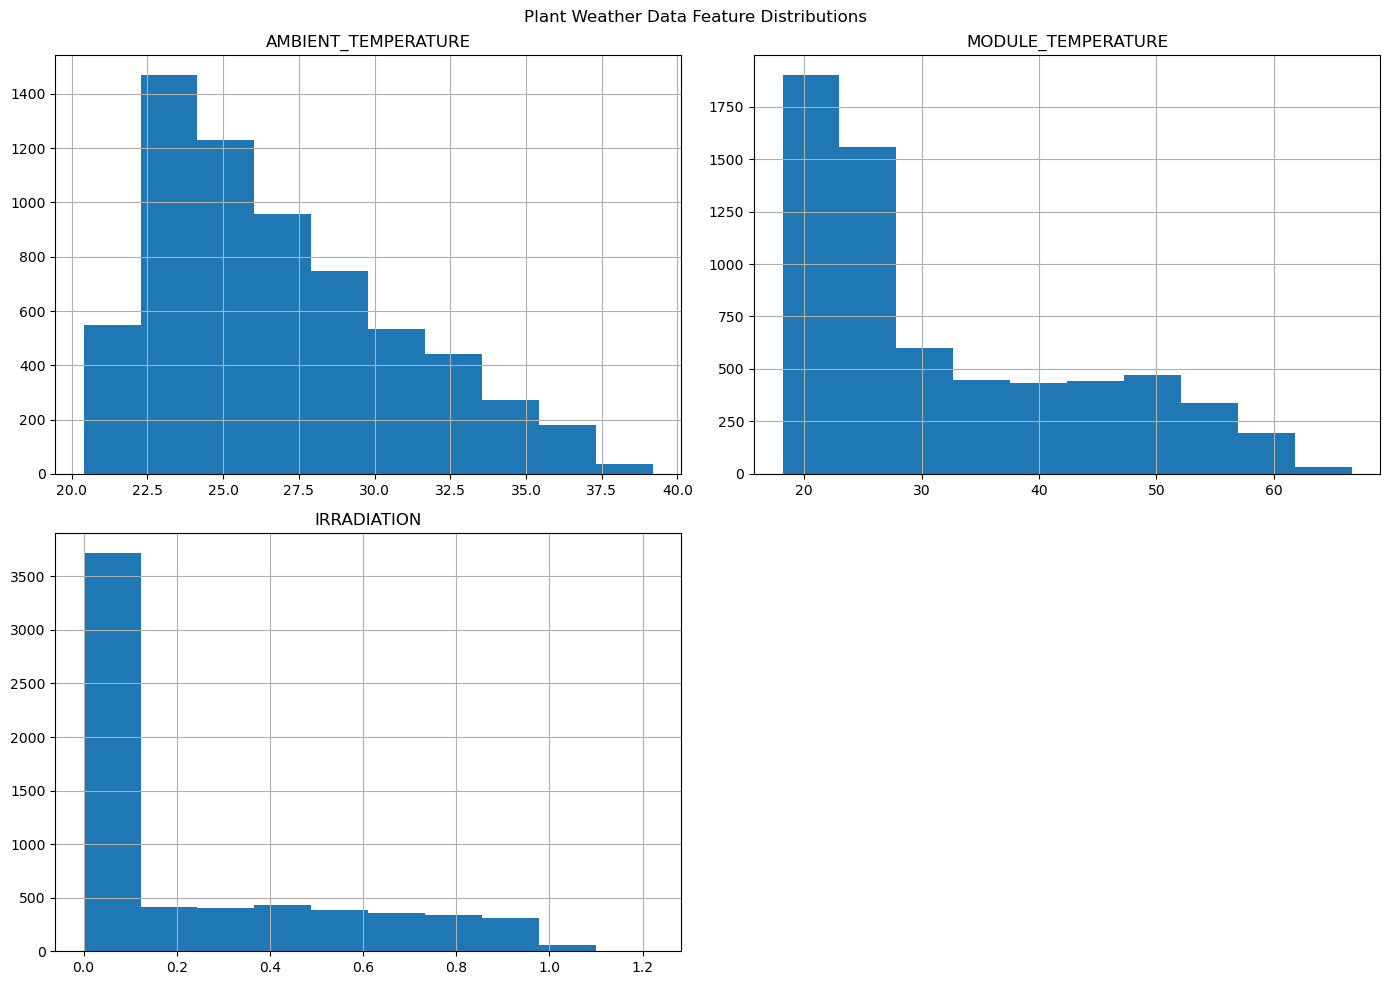

In [186]:
# Weather Data
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(14, 10))
plt.suptitle("Plant Weather Data Feature Distributions")
plt.tight_layout()
plt.show()

Insight on distribution: 
- Normalized distribution is seen for Ambient Temperature, a slightly for  Module Temperature. 
- There is a noticable right-skew to Irradition variable, potential to apply a log transformation to help skewness. 

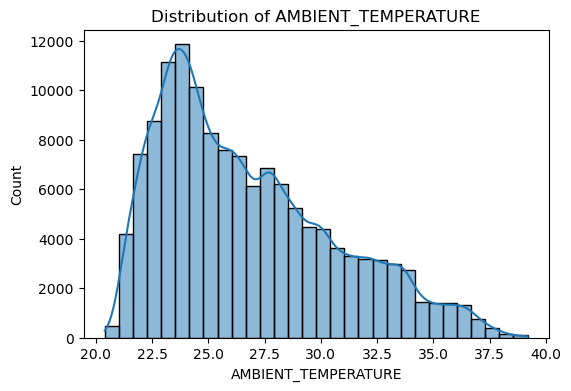

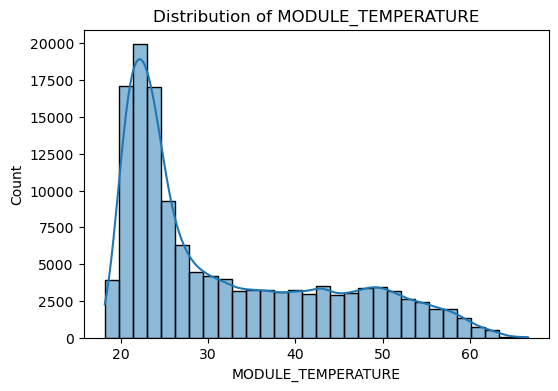

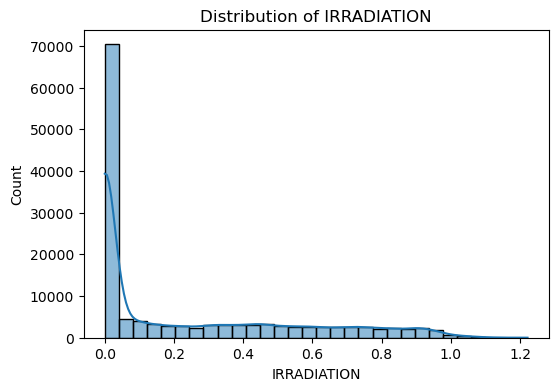

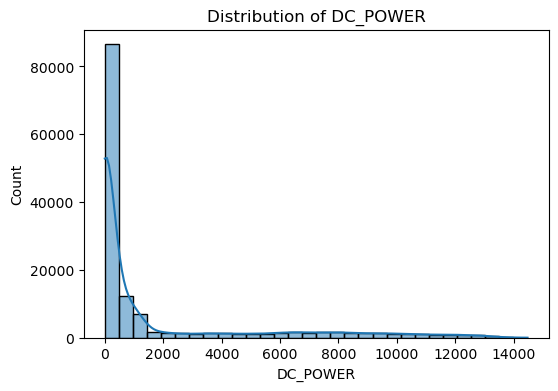

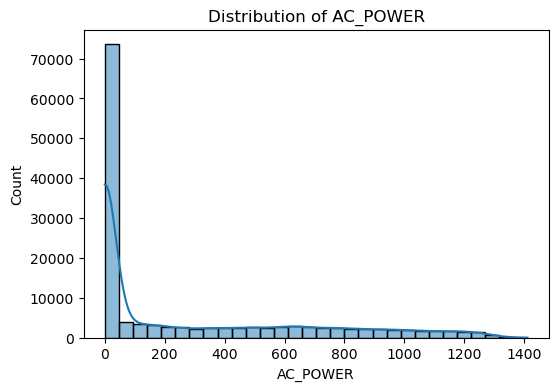

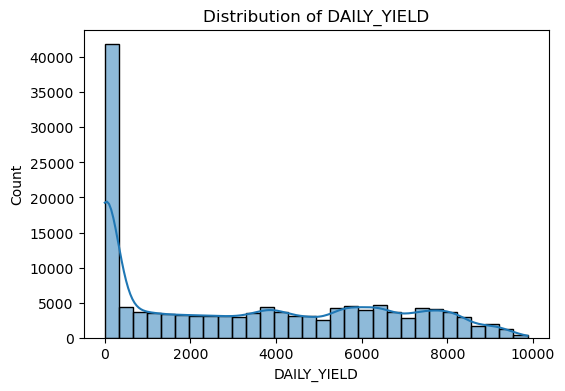

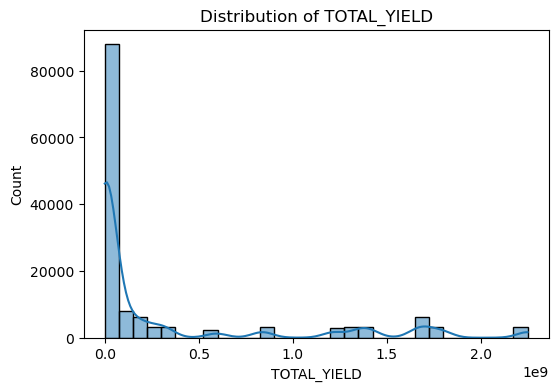

In [340]:
numerical_cols = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

## 2. Identify Relationships and Trends  

### 2.1 Feature-Specific Univariate Analysis

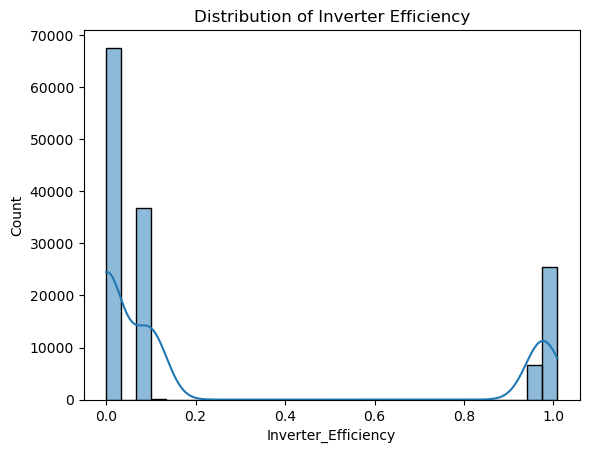

In [233]:
#Inverter Efficiency
sns.histplot(df['Inverter_Efficiency'], kde=True, bins=30)
plt.title('Distribution of Inverter Efficiency')
plt.show()

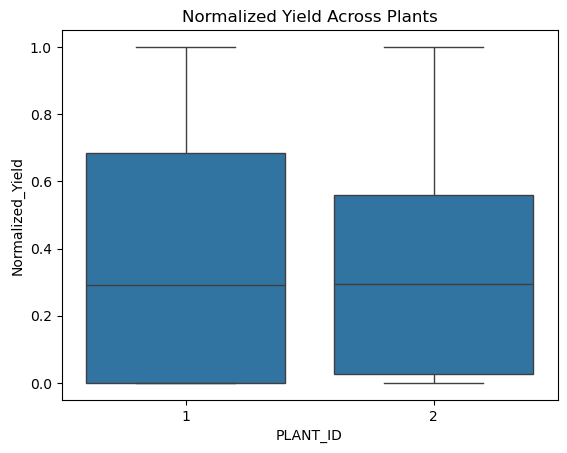

In [237]:
#Normalized Yield: 
sns.boxplot(x='PLANT_ID', y='Normalized_Yield', data=df)
plt.title('Normalized Yield Across Plants')
plt.show()

### 2.2 Bivariate Analysis 

#### Correlation Analysis

In [223]:
# Convert DATE_TIME column
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

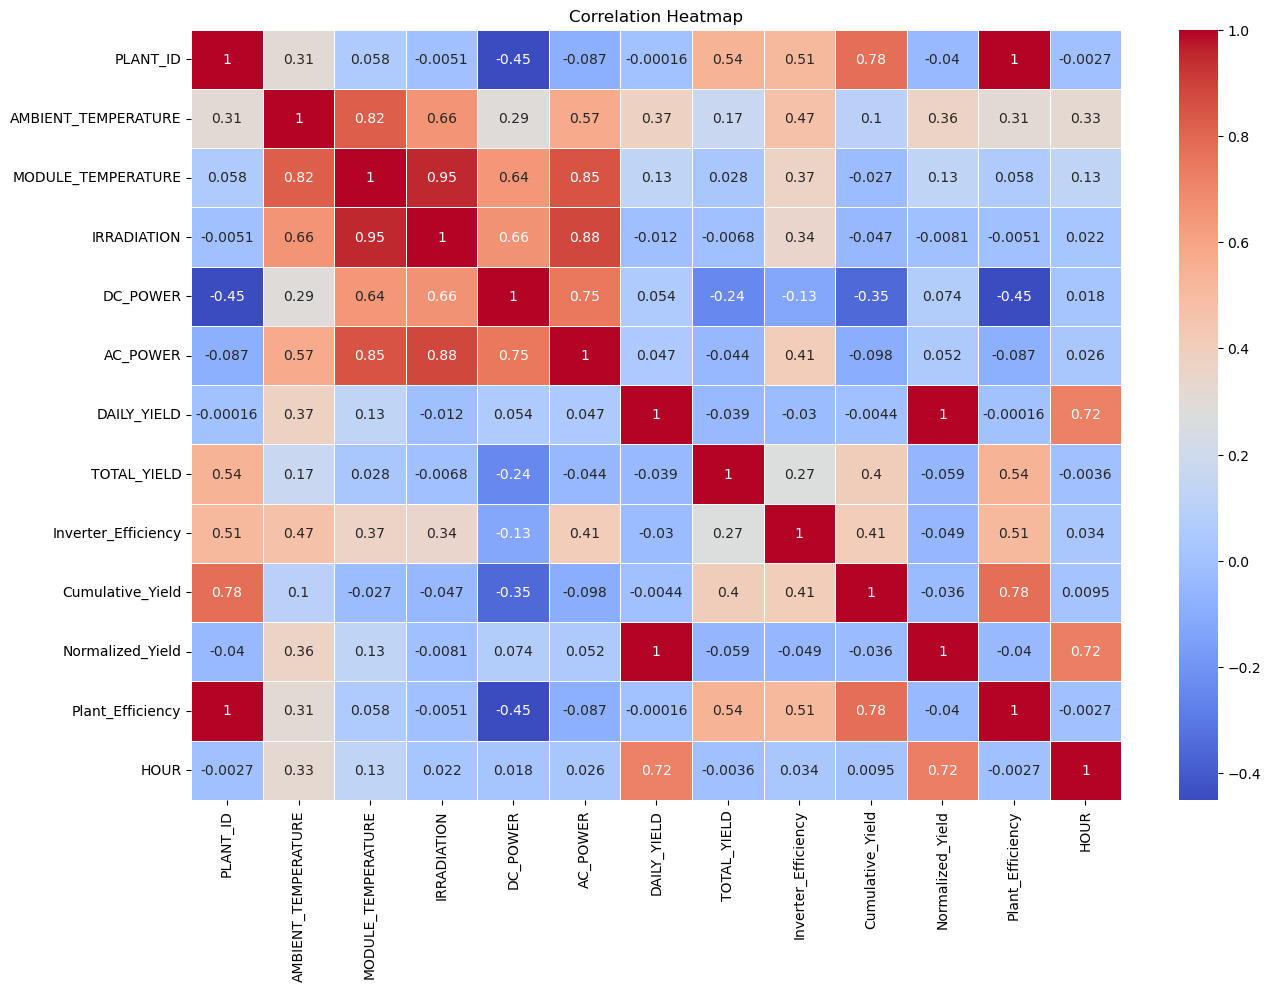

In [227]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr_df = df[numeric_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 2.3 Advanced Bivariate Analysis

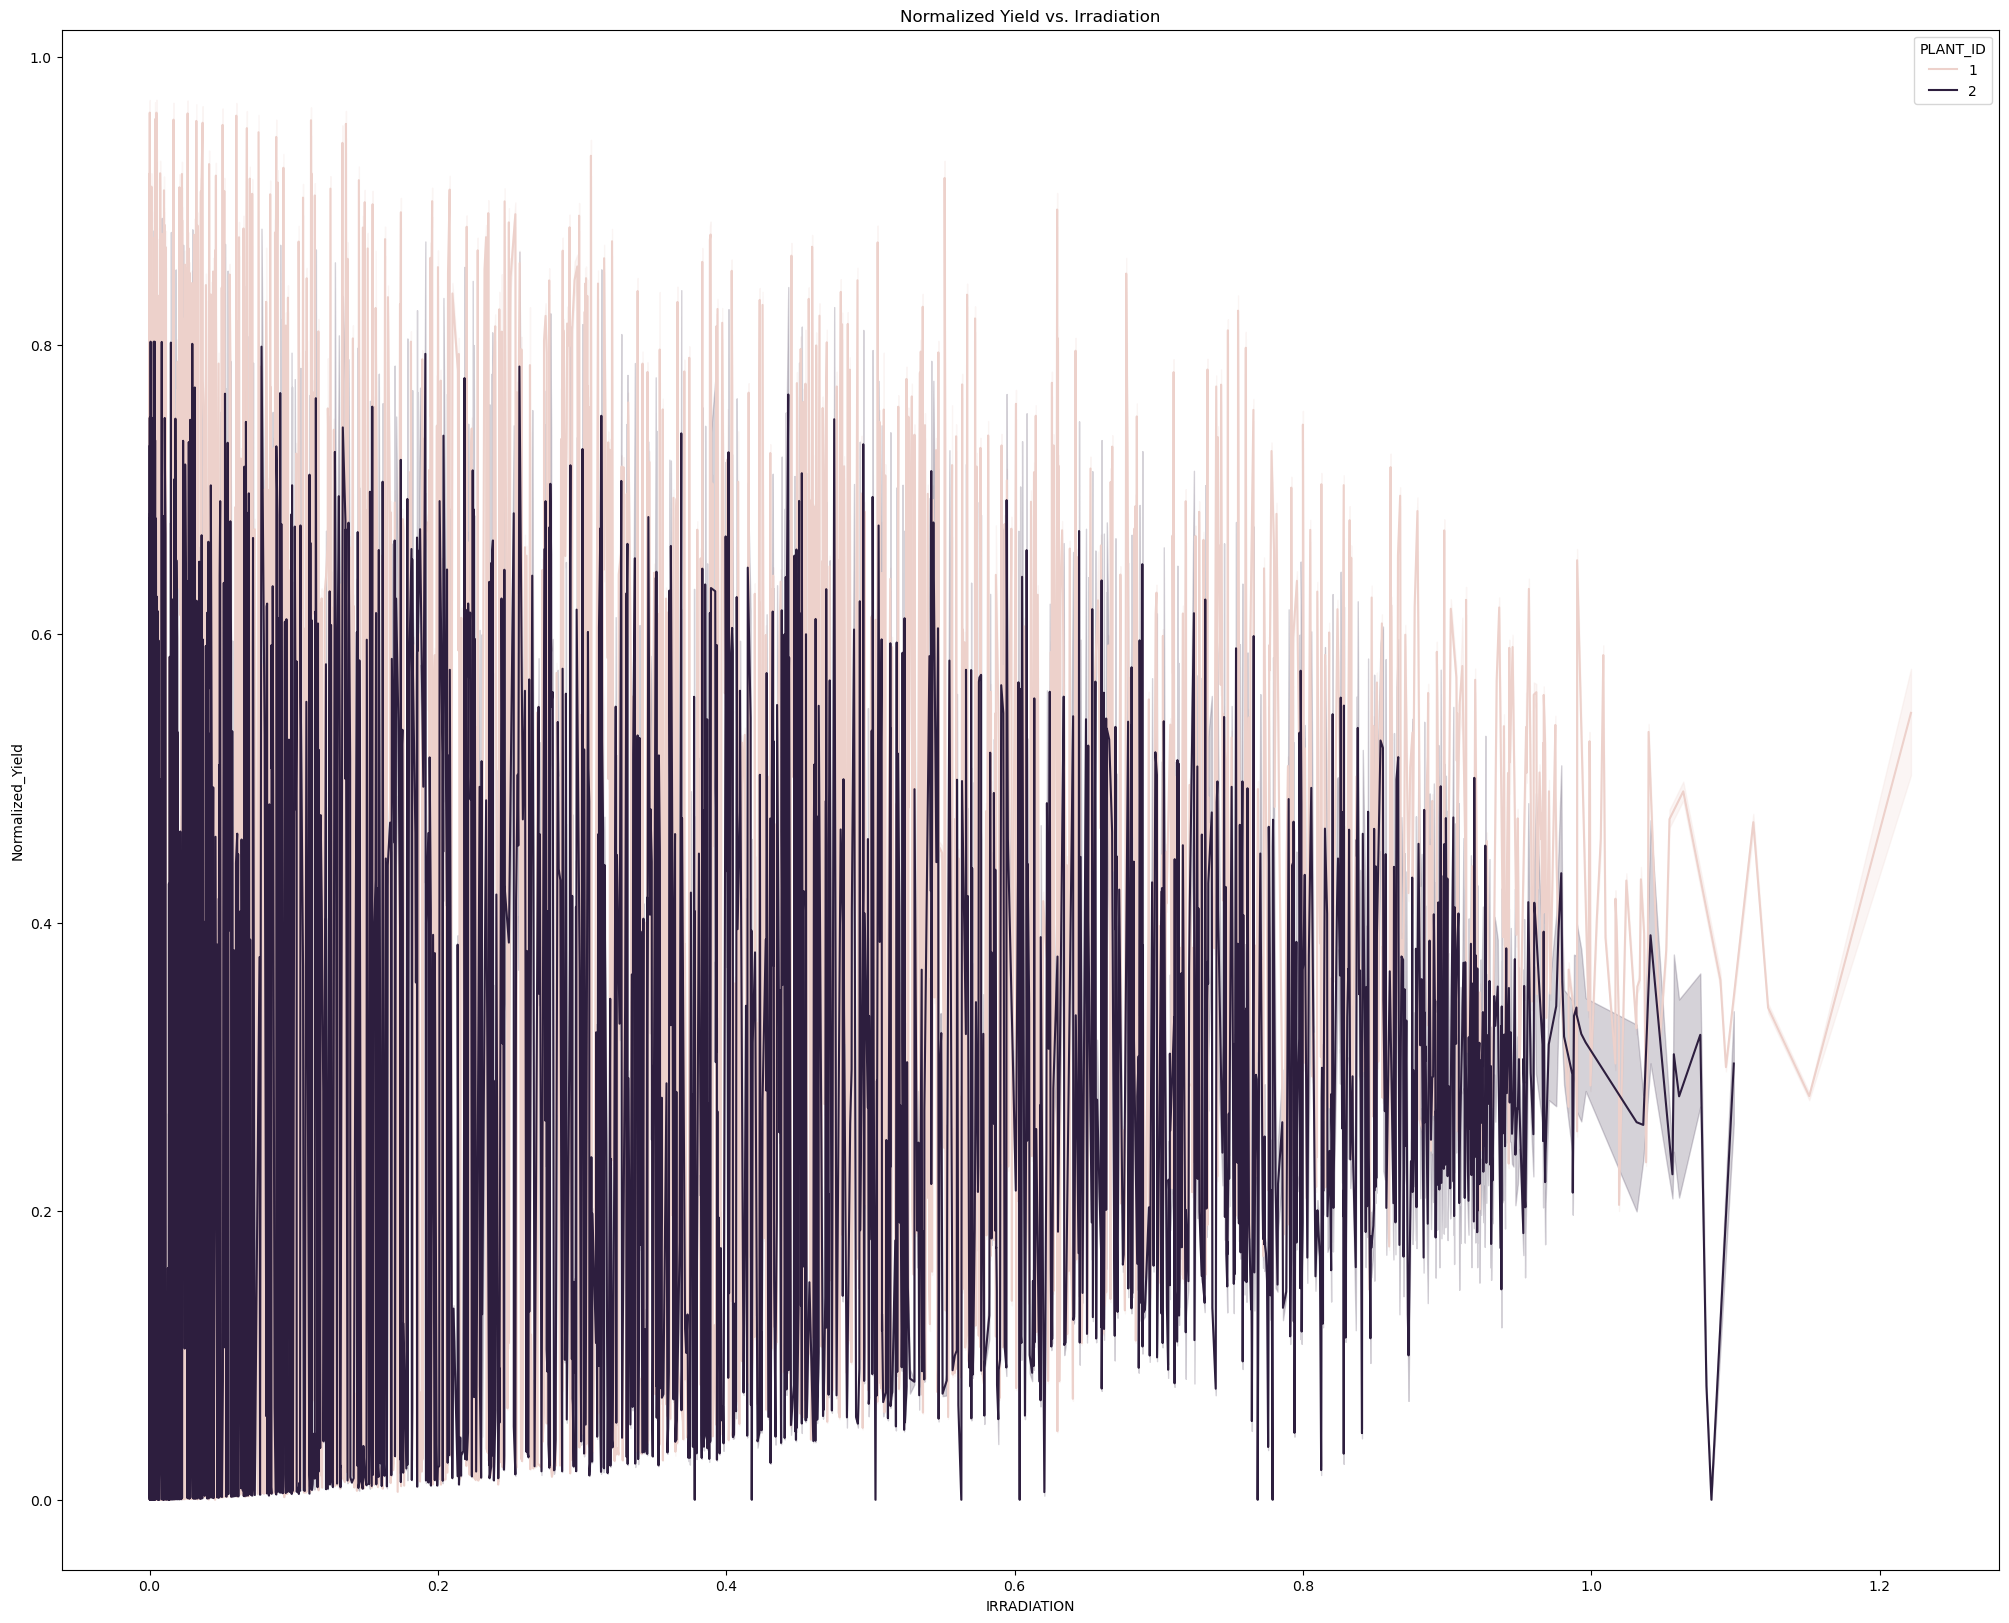

In [303]:
plt.figure(figsize=(25, 20))
sns.lineplot(x='IRRADIATION', y='Normalized_Yield', hue='PLANT_ID', data=df)
plt.title('Normalized Yield vs. Irradiation')
plt.show()

#### Plant-Level Comparisons

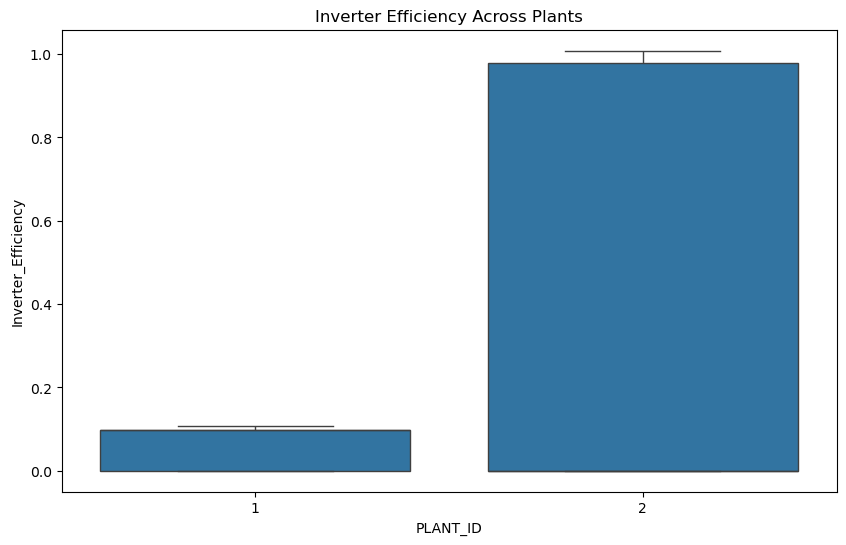

In [329]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLANT_ID', y='Inverter_Efficiency', data=df)
plt.title('Inverter Efficiency Across Plants')
plt.show()

In [ ]:
sns.scatterplot(x='IRRADIATION', y='DC_POWER', hue='PLANT_ID', data=df)
plt.title('DC Power vs Irradiation')
plt.show()


### 2.5 Time Series Analysis 

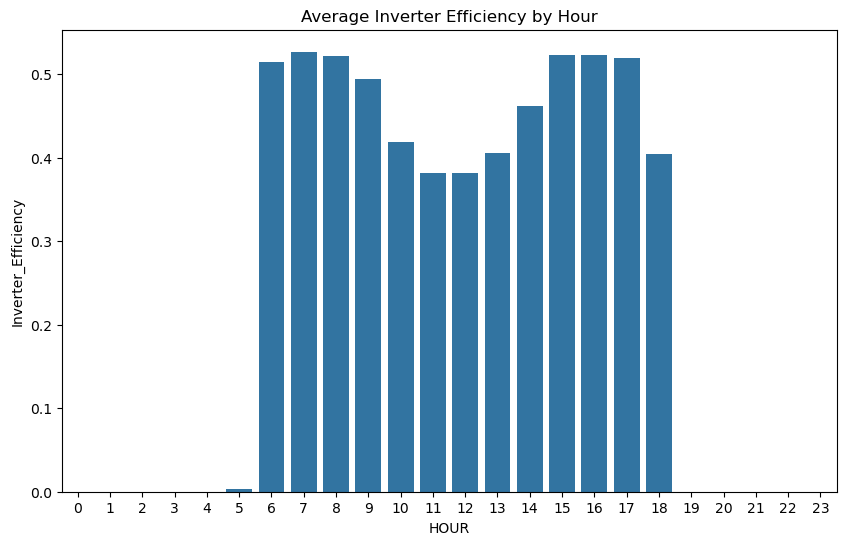

In [323]:
hourly_efficiency = df.groupby('HOUR')['Inverter_Efficiency'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='HOUR', y='Inverter_Efficiency', data=hourly_efficiency)
plt.title('Average Inverter Efficiency by Hour')
plt.show()

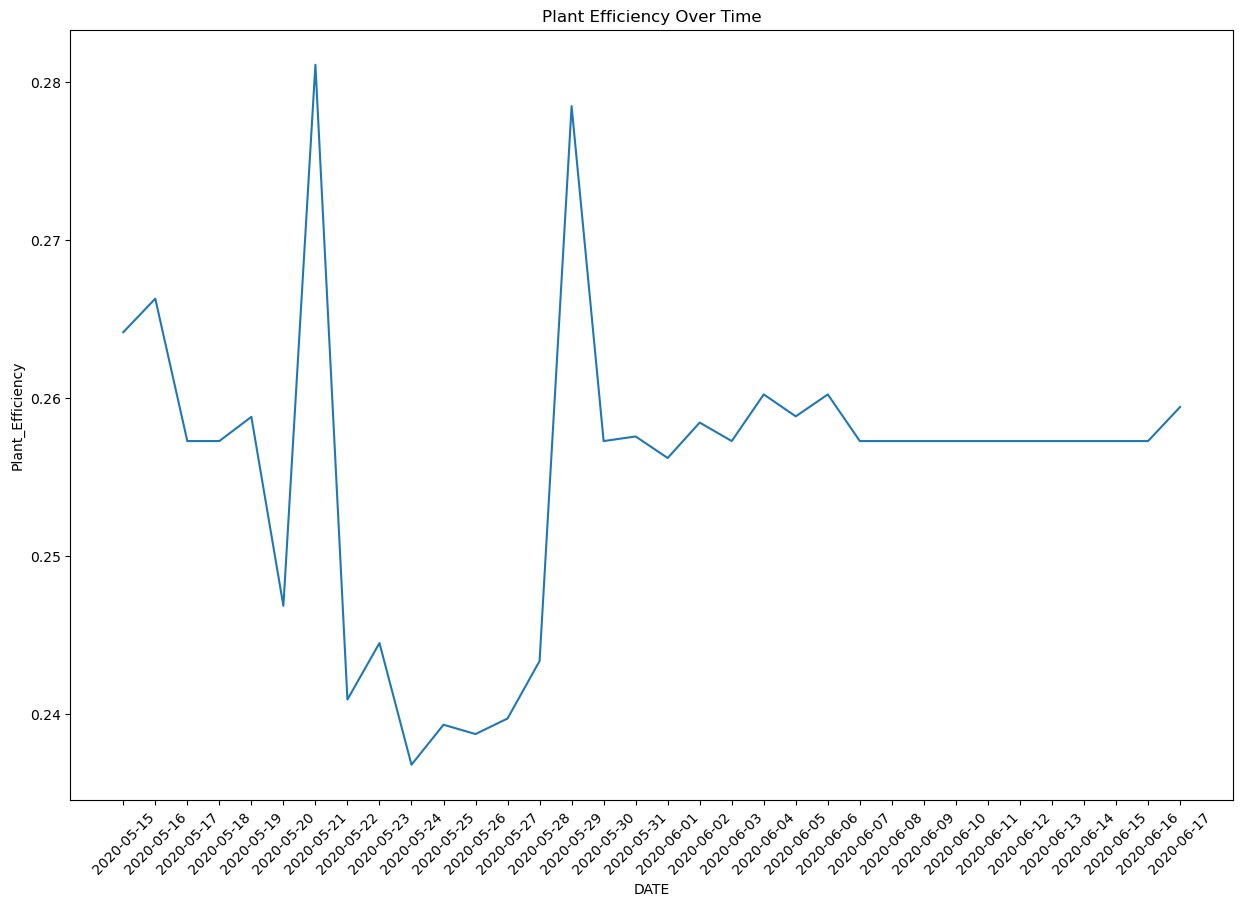

In [327]:
daily_efficiency = df.groupby('DATE')['Plant_Efficiency'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(x='DATE', y='Plant_Efficiency', data=daily_efficiency)
plt.xticks(rotation=45) 
plt.title('Plant Efficiency Over Time')
plt.show()

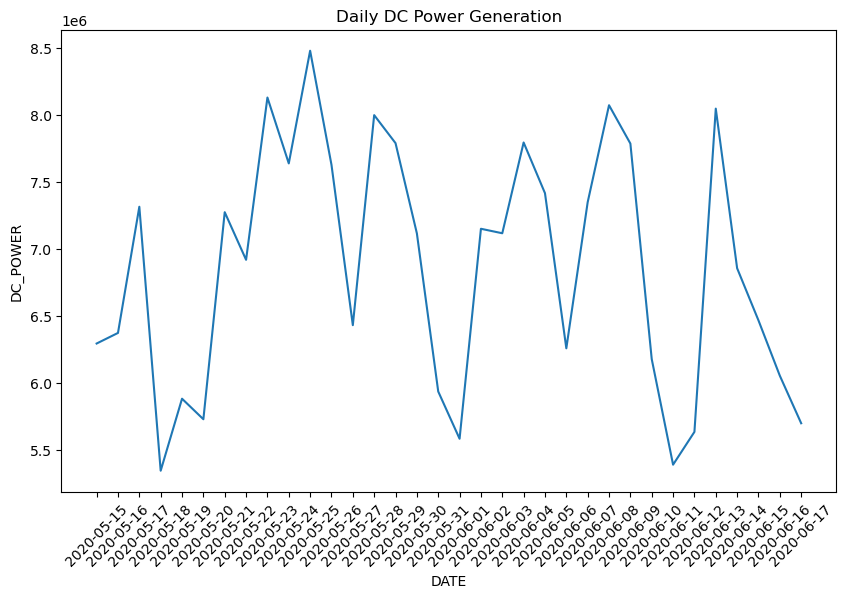

In [289]:
daily_power = df.groupby('DATE')['DC_POWER'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='DC_POWER', data=daily_power)
plt.xticks(rotation=45) 
plt.title('Daily DC Power Generation')
plt.show()

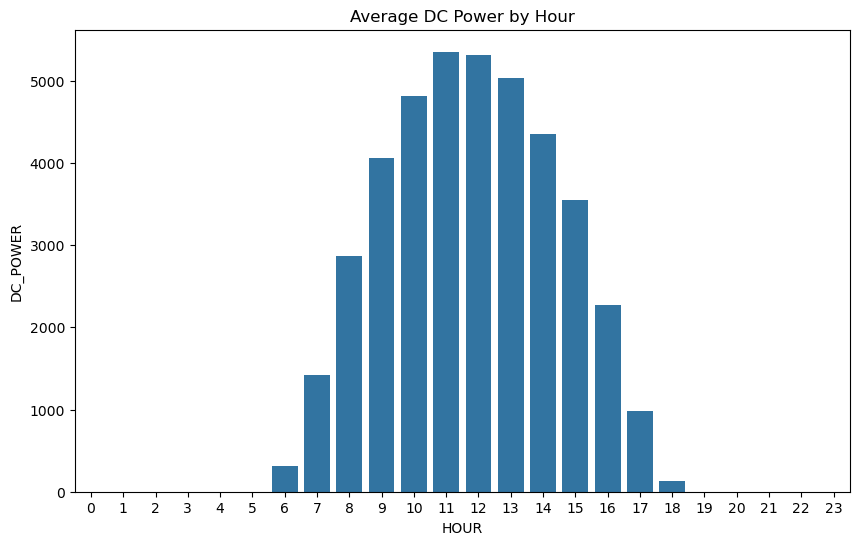

In [307]:
hourly_power = df.groupby('HOUR')['DC_POWER'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='HOUR', y='DC_POWER', data=hourly_power)
plt.title('Average DC Power by Hour')
plt.show()

## 3. Outlier Detection & Anomaly Investigation 

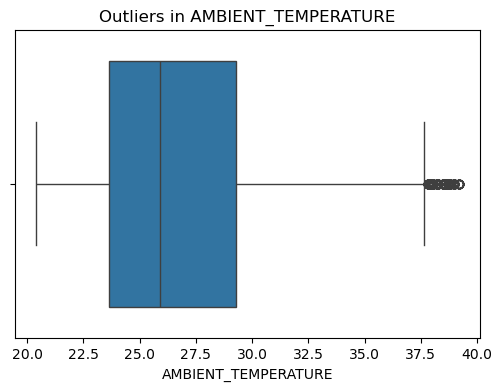

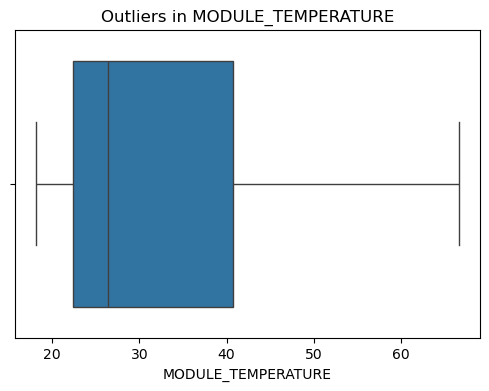

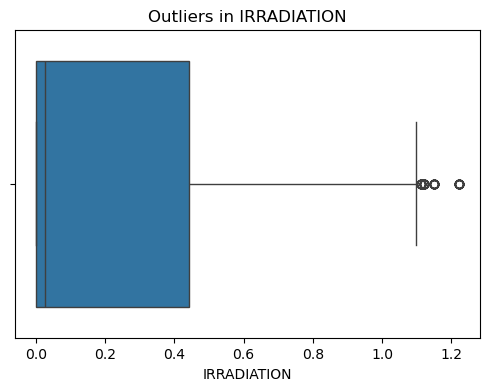

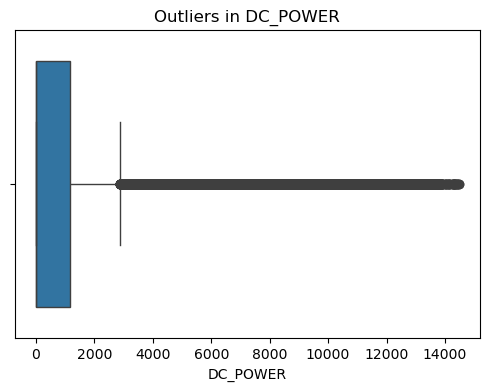

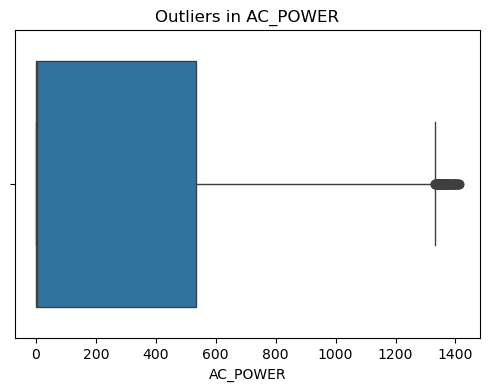

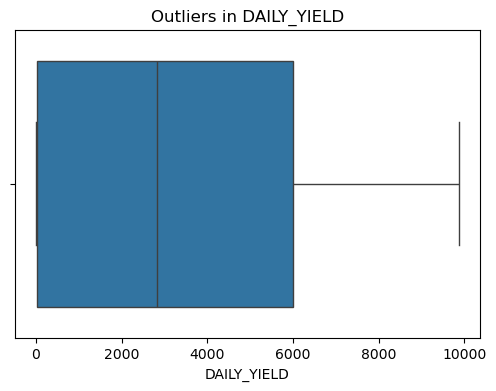

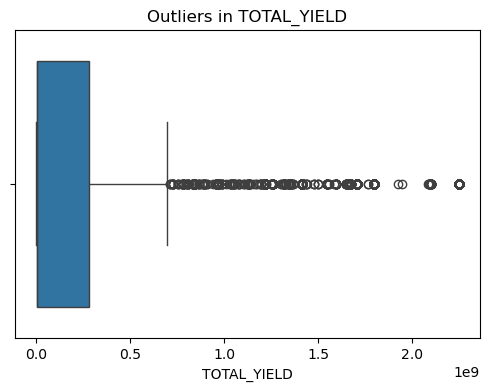

In [281]:
#Investigate Anomalies
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

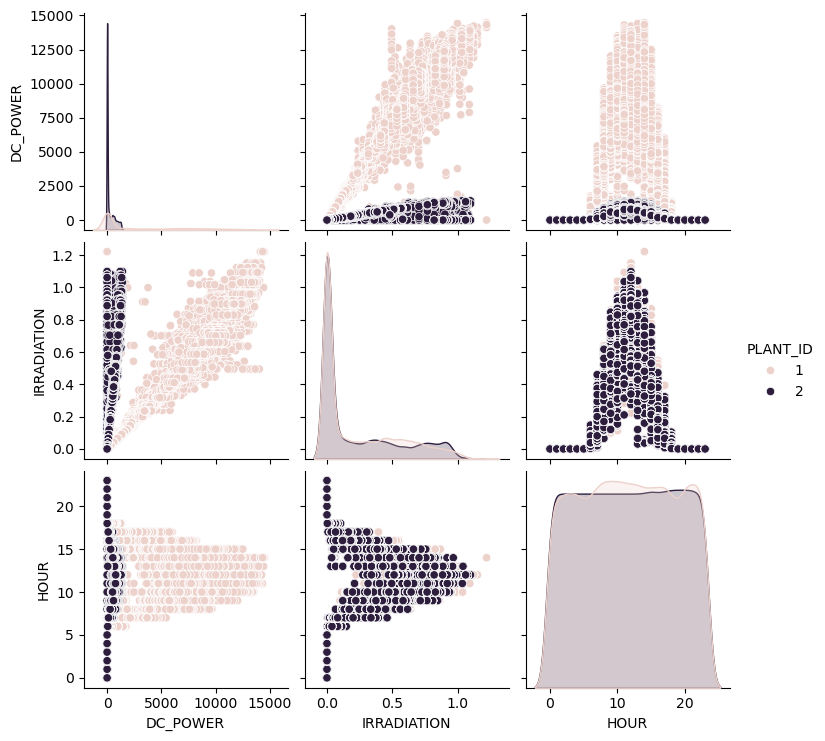

In [331]:
sns.pairplot(df, vars=['DC_POWER', 'IRRADIATION', 'HOUR'], hue='PLANT_ID')
plt.show()